# 01 — Exploration (EDA)

**Goal:** Understand distributions, spot issues, and form hypotheses.

We will be loading the dataset `bodyfat.arff`, which lists estimates of the percentage of body fat determined by underwater weighing and various body circumference measurements for 252 men. The purpose of this notebook is to conduct exploratory data analysis to understand the distribution of these body fat percentages and how each of the features influences and correlates with the label, as well as to spot any issues that may cause errors when training models without any preprocessing (which will be done in the next notebook).

**Checklist**
- Correlations (Pearson/Spearman) & pairwise plots.
- Domain sanity checks (units, impossible values).

In [35]:
# Imports
import pandas as pd, numpy as np
from scipy.io import arff
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

pd.set_option("display.max_columns", 100)

/kaggle/input/bodyfat/bodyfat.arff


In [36]:
# Load data
file_path = '/kaggle/input/bodyfat/bodyfat.arff'
bf_arff = arff.loadarff(file_path)
df = pd.DataFrame(bf_arff[0])
df.head()

,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,class
0,1.0708,23.0,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,12.3
1,1.0853,22.0,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,6.1
2,1.0414,22.0,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,25.3
3,1.0751,26.0,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2,10.4
4,1.0340,24.0,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7,28.7


### Inspecting for dtypes, shape, NA values and duplicates

In [37]:
# Quick info
df.info(), df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   Age      252 non-null    float64
 2   Weight   252 non-null    float64
 3   Height   252 non-null    float64
 4   Neck     252 non-null    float64
 5   Chest    252 non-null    float64
 6   Abdomen  252 non-null    float64
 7   Hip      252 non-null    float64
 8   Thigh    252 non-null    float64
 9   Knee     252 non-null    float64
 10  Ankle    252 non-null    float64
 11  Biceps   252 non-null    float64
 12  Forearm  252 non-null    float64
 13  Wrist    252 non-null    float64
 14  class    252 non-null    float64
dtypes: float64(15)
memory usage: 29.7 KB


(None, (252, 15))

In [38]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Density,252.0,1.055574,0.019031,0.995,1.0414,1.0549,1.0704,1.1089
Age,252.0,44.884921,12.602040,22.000,35.7500,43.0000,54.0000,81.0000
Weight,252.0,178.924405,29.389160,118.500,159.0000,176.5000,197.0000,363.1500
Height,252.0,70.148810,3.662856,29.500,68.2500,70.0000,72.2500,77.7500
Neck,252.0,37.992063,2.430913,31.100,36.4000,38.0000,39.4250,51.2000
Chest,252.0,100.824206,8.430476,79.300,94.3500,99.6500,105.3750,136.2000
Abdomen,252.0,92.555952,10.783077,69.400,84.5750,90.9500,99.3250,148.1000
Hip,252.0,99.904762,7.164058,85.000,95.5000,99.3000,103.5250,147.7000
Thigh,252.0,59.405952,5.249952,47.200,56.0000,59.0000,62.3500,87.3000
Knee,252.0,38.590476,2.411805,33.000,36.9750,38.5000,39.9250,49.1000


In [56]:
# Check for any NA values across the data
df.isnull().sum()

Density    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
class      0
dtype: int64

In [40]:
# Check for any duplicated rows
df[df.duplicated() == True]

,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,class


### Data visualisation to understand distribution, correlation, outliers

#### 1. Target Distribution (Body Fat %) <br>
This is to get a general idea of how the body fat percentages of the 252 men are distributed

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


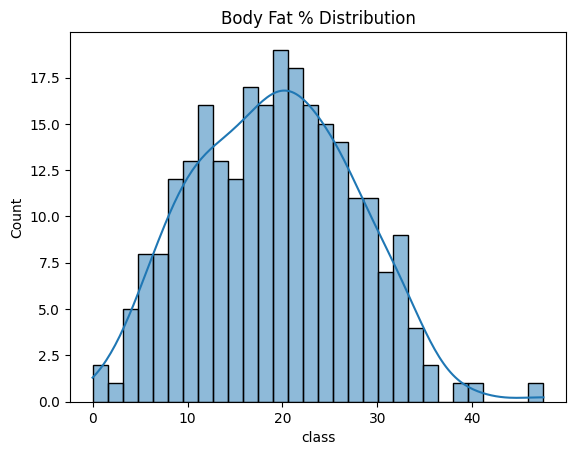

In [59]:
# Target distribution
sns.histplot(df['class'], bins=30, kde=True)
plt.title('Body Fat % Distribution')
plt.show()

We can see that there are few potential 'outliers' within the distribution chart, but they are still within the realm of possibility. Just to double check, how about seeing them in tabular form?

We will make use of both pairs: mean & standard deviation / quartiles & interquartile range, to classify statistically which are considered as potential 'outliers'

In [42]:
df['class'].describe()

count    252.000000
mean      19.150794
std        8.368740
min        0.000000
25%       12.475000
50%       19.200000
75%       25.300000
max       47.500000
Name: class, dtype: float64

In [43]:
# Finding outliers with mean and std on both sides of distribution
mean_out_up = 19.150794 + 3 * 8.36874
mean_out_down = 19.150794 - 3 * 8.36874
mean_outliers = df[(df['class'] > mean_out_up) | (df['class'] < mean_out_down)]
mean_outliers

,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,class
215,0.995,51.0,219.0,64.0,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4,47.5


In [44]:
# Finding outliers with IQR and quartiles on both sides of the distribution
iqr_out_up = 25.3 + 1.5 * (25.3 - 12.475)
iqr_out_down = 12.475 - 1.5 * (25.3 - 12.475)
iqr_outliers = df[(df['class'] > iqr_out_up) | (df['class'] < iqr_out_down)]
iqr_outliers

,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,class
215,0.995,51.0,219.0,64.0,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4,47.5


So far, based on both outlier formulas we have constructed, the only statistical outlier within our dataset is the observation at index `215`, where the body fat percentage of the individual is 47.5%. When closely examining the row, there are no such entries under each of the features that we can rule out as 'human error' when creating this dataset. The fact that there are indeed some people with this much body fat and is iwthin the realm of reality, we don't have to worry about it affecting the model's overall accuracy.

#### 2. Correlation between features and target <br>
Diving deeper to inspect the correlation between each feature and the target of our dataset

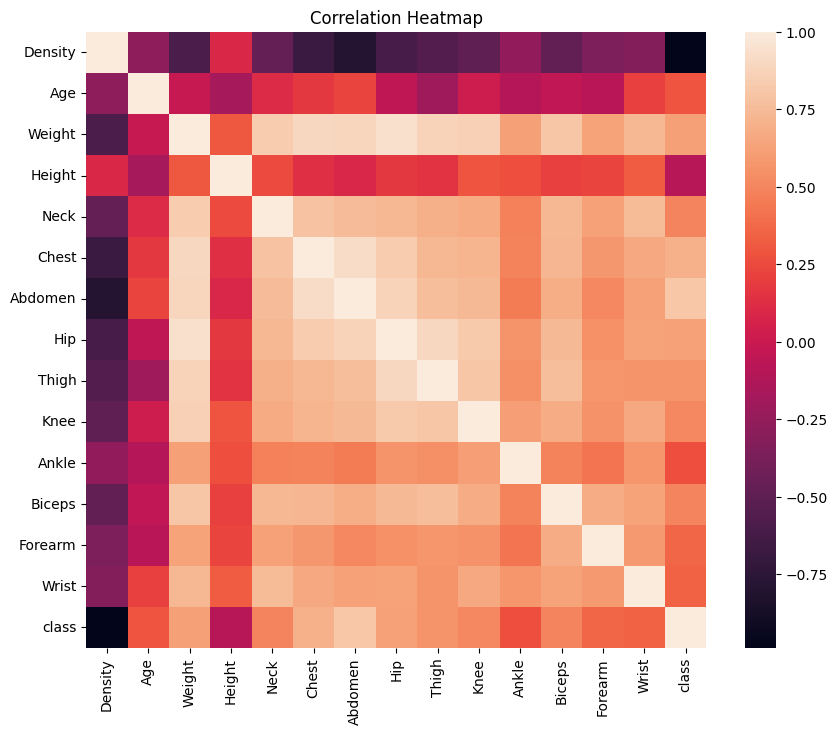

In [46]:
# Correlations
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=False)
plt.title('Correlation Heatmap')
plt.show()

The above heatmap illustrates the correlation of each feature and the target with each other, with the spectrum depicting:
- The darker the colour is, the more that feature/target has a negative correlation with the other feature/target
- The lighter the colour is, the more that feature/target has a positive correlation with the other feature/target
- The darkest colours have a strong negative correlation, and the lightest colours have a strong positive correlation

Why not we explore further? We will be creating a scatter diagram for each feature with the x-axis and the target as the y-axis. Alongside these charts, the correlation coefficient will also be printed alongside it

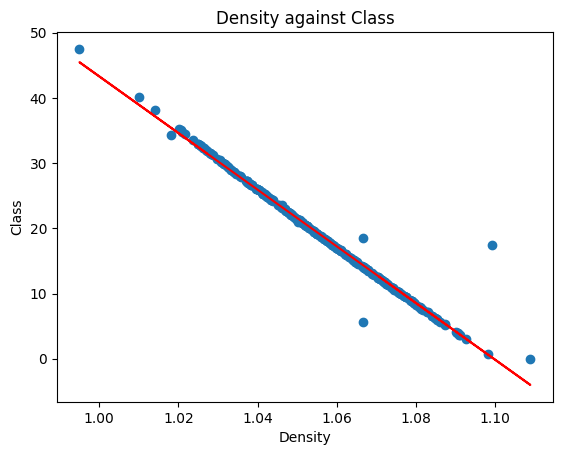

Correlation = -0.988


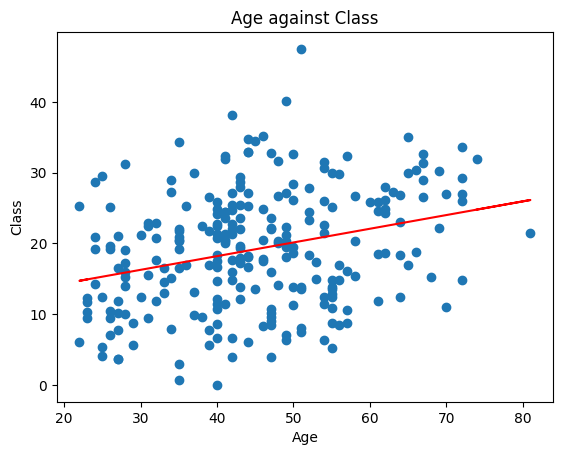

Correlation = 0.291


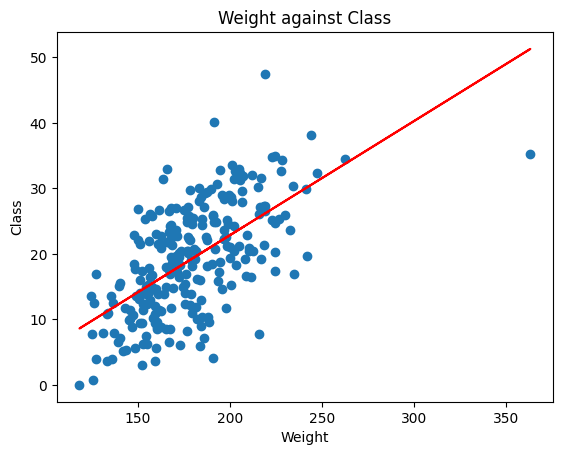

Correlation = 0.612


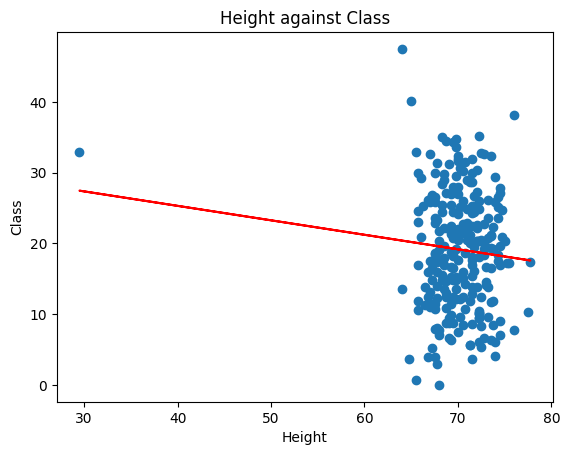

Correlation = -0.089


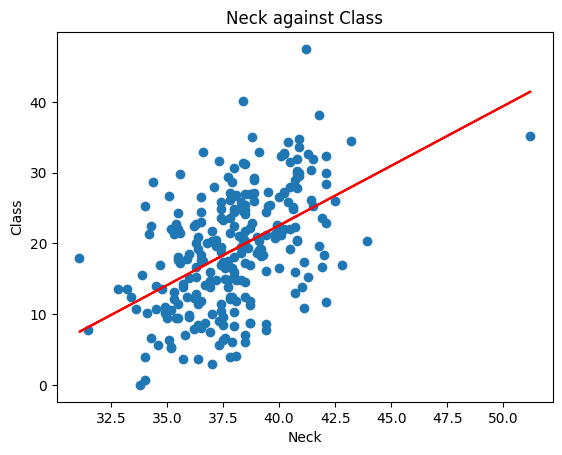

Correlation = 0.491


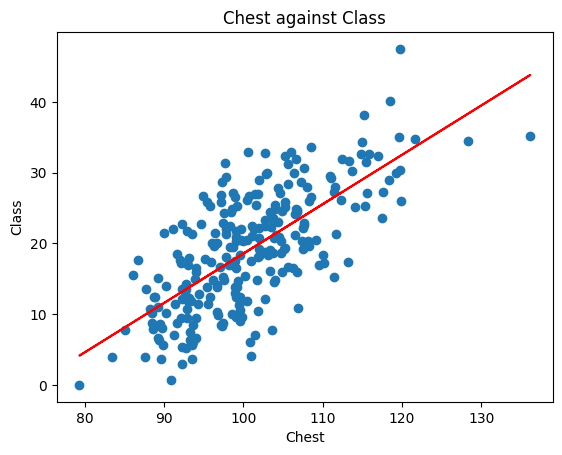

Correlation = 0.703


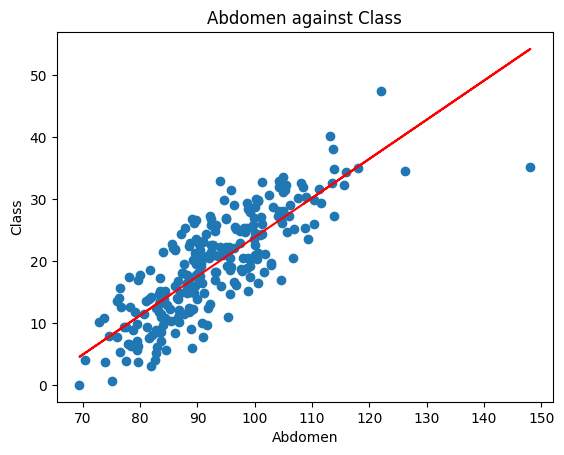

Correlation = 0.813


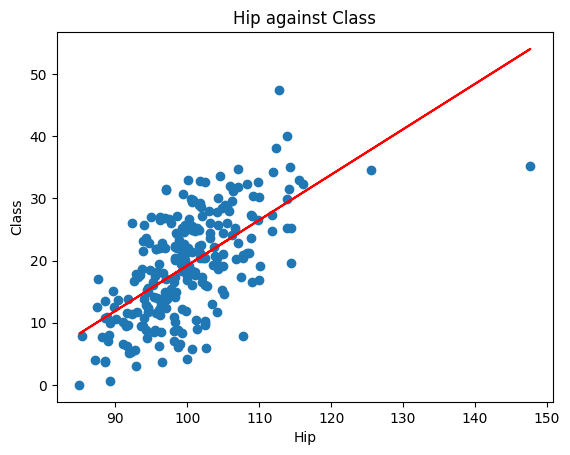

Correlation = 0.625


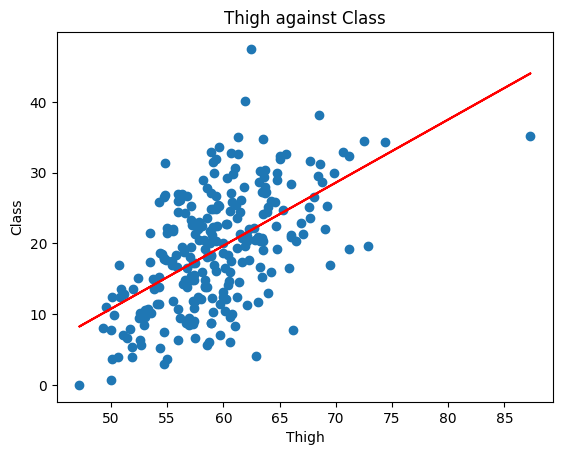

Correlation = 0.56


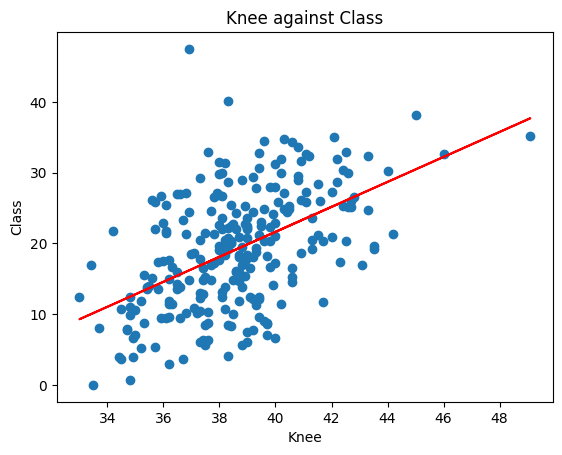

Correlation = 0.509


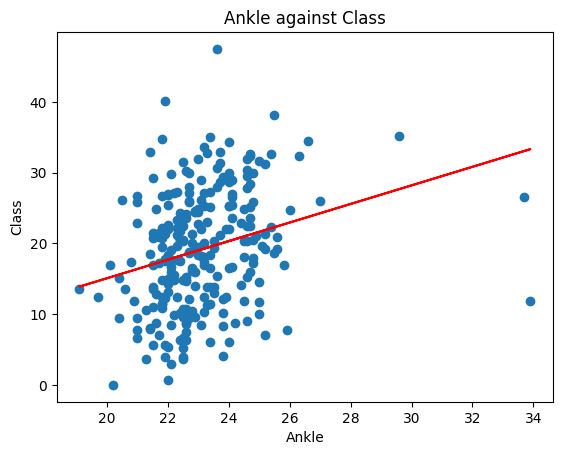

Correlation = 0.266


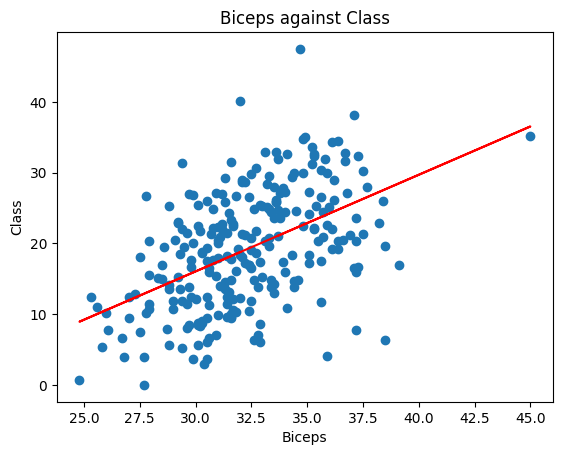

Correlation = 0.493


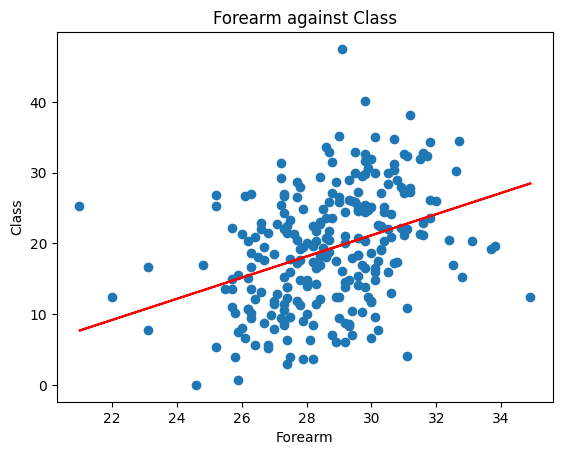

Correlation = 0.361


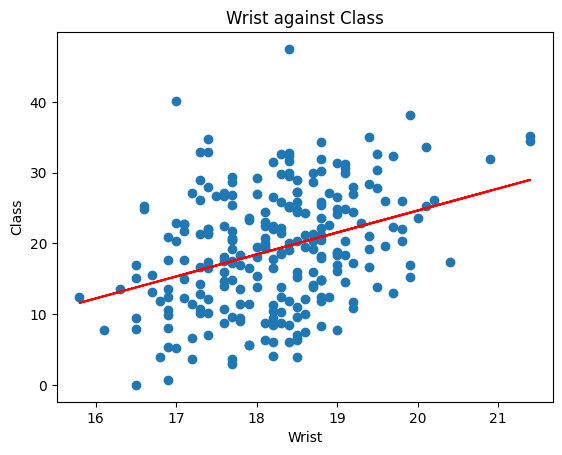

Correlation = 0.347


In [62]:
# Creating scatter graphs to compare correlation w/ line of best fit
cols = [col for col in df.drop('class', axis=1).columns]
for col in cols :
    plt.scatter(df[col], df['class'])
    plt.xlabel(col)
    plt.ylabel('Class')
    plt.title(f'{col} against Class')
    # Calculate the slope and intercept for a linear fit (degree 1)
    m, c = np.polyfit(df[col], df['class'], 1)
    line_of_best_fit = m * df[col] + c
    plt.plot(df[col], line_of_best_fit, color='red', label='Line of Best Fit')
    plt.show()
    corr = np.corrcoef(df[col], df['class'])
    print(f'Correlation = {round(corr[0, 1], 3)}') # correlation rounded to 3 d.p.

Based on observation of these graphs and according to the coefficient threshold that has been agreed with, the features that do show a correlation with `'class'` are the following:

**Strong Correlation (0.7 <= |corr| <= 1)**
- `'Density', 'Chest', 'Abdomen'`

**Acceptable Correlation (~0.5 <= |corr| < 0.7)**
- `'Weight', 'Neck', 'Hip', 'Thigh', 'Knee', 'Biceps'`

Why the accepted features have been divided into these two categories is for experimental purposes (in case we want to find out whether relying on **only** the features under Strong Correlation can produce better predictions than having all the accepted features under the belt).

On the other hand, the features that don't show any significant correlation with `'class'` and therefore will be dropped from the dataset will be the following:

- `'Age', 'Height', 'Ankle', 'Forearm', 'Wrist'`

---
As we can notice from both the heatmap and the scatter graphs, `'Density'` has a very high coefficient, which is very interesting. Maybe examining how density is calculated for this dataset may give us some insight regarding this.

The following is extracted from the dataset's details:

> Volume, and hence body density, can be accurately measured in a variety of ways. The technique of underwater weighing "computes body volume as the difference between body weight measured in air and weight measured during water submersion. In other words, body volume is equal to the loss of weight in water with the appropriate temperature correction for the water's density.

This shows that the process of how one's density is calculated may not always be feasible for the general individual, who often not have the facilities and the knowledge on how to find their own density. Therefore, for the sake of this reason, we will be omitting the column for our model training (and this will lower our chances of getting an accurate model easily, giving us quite a challenge we'll gladly accept).